In [29]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [30]:
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [31]:
df = df.drop(['Unnamed: 0', 'customerID'], axis = 1)
missing_values = 0
for i in range(len(df.index)):
    if df['TotalCharges'][i].replace('.', '').isdigit() == False:
        df.iloc[i, 18] = '100'
        missing_values += 1

        
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [32]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(str)
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
total_charge = df['TotalCharges']
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [33]:
ch = {'Yes': 'Client left', 'No': 'Client stayed'}
df['Churn'] = df['Churn'].map(ch)
churn = df.groupby('Churn').agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
churn

,Churn,count
0,Client left,1587
1,Client stayed,4399


In [34]:
fig = px.pie(churn, values = churn['count'], names = churn['Churn'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.85, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer churn', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

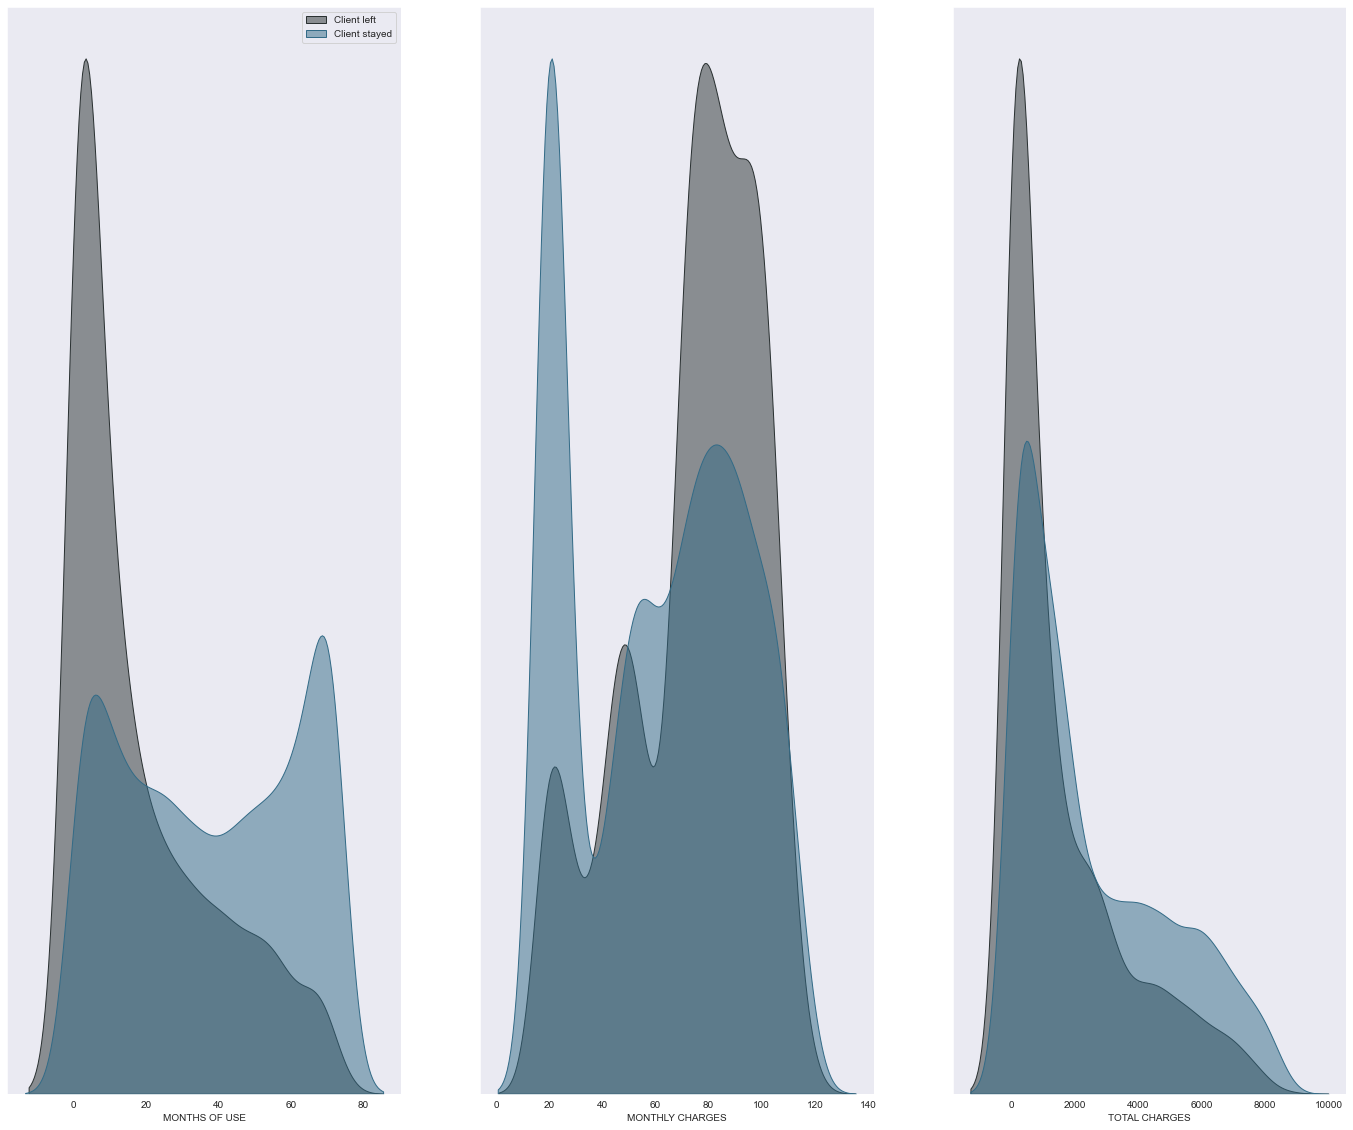

In [41]:
fig = plt.figure(figsize = (24, 20))

plt.subplot(131)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == "Client left"')['tenure'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(df.query('Churn == "Client stayed"')['tenure'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHS OF USE')
plt.yticks([])
plt.legend()


plt.subplot(132)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == "Client left"')['MonthlyCharges'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(df.query('Churn == "Client stayed"')['MonthlyCharges'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHLY CHARGES')
plt.yticks([])

plt.subplot(133)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == "Client left"')['TotalCharges'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(df.query('Churn == "Client stayed"')['TotalCharges'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('TOTAL CHARGES')
plt.yticks([])


plt.show()

In [42]:
spouse = df.groupby(['Partner', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
spouse.iloc[[0,1], 0] = 'Not married'
spouse.iloc[[2,3], 0] = 'Married'
spouse

,Partner,Churn,count
0,Not married,Client left,1011
1,Not married,Client stayed,2071
2,Married,Client left,576
3,Married,Client stayed,2328


In [43]:
SeniorCitizen = df.groupby(['SeniorCitizen', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
SeniorCitizen.iloc[[0,1], 0] = 'Not pensioner'
SeniorCitizen.iloc[[2,3], 0] = 'Pensioner'
SeniorCitizen

,SeniorCitizen,Churn,count
0,Not pensioner,Client left,1185
1,Not pensioner,Client stayed,3835
2,Pensioner,Client left,402
3,Pensioner,Client stayed,564


In [44]:
fig = px.sunburst(SeniorCitizen, path = ['SeniorCitizen', 'Churn'], values = 'count', color = 'SeniorCitizen', title = 'Affect of retirement on customer churn',
                 color_discrete_map = {'Not pensioner': '#336B87', 'Pensioner': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()
##########################
fig = px.sunburst(spouse, path = ['Partner', 'Churn'], values = 'count', color = 'Partner', title = 'Affect of having a spouse on customer churn',
                 color_discrete_map = {'Not married': '#336B87', 'Married': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [45]:
s_tv = df.groupby(['StreamingTV', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()

s_tv

,StreamingTV,Churn,count
0,No,Client left,799
1,No,Client stayed,1590
2,No internet service,Client left,99
3,No internet service,Client stayed,1192
4,Yes,Client left,689
5,Yes,Client stayed,1617


In [46]:
s_mov = df.groupby(['StreamingMovies', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()

s_mov

,StreamingMovies,Churn,count
0,No,Client left,792
1,No,Client stayed,1564
2,No internet service,Client left,99
3,No internet service,Client stayed,1192
4,Yes,Client left,696
5,Yes,Client stayed,1643


In [47]:
fig = px.sunburst(s_tv, path = ['StreamingTV', 'Churn'], values = 'count', color = 'StreamingTV', title = 'Distribution of customer churn by streaming TV',
                 color_discrete_map = {'No': '#336B87', 'Yes': '#2A3132', 'No internet service': '#763626'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()
#######################################
fig = px.sunburst(s_mov, path = ['StreamingMovies', 'Churn'], values = 'count', color = 'StreamingMovies', title = 'Distribution of customer churn by streaming movies',
                 color_discrete_map = {'No': '#336B87', 'Yes': '#2A3132', 'No internet service': '#763626'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()